## Carregamento e processamento dos Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 
pd.set_option('display.float_format', '{:.2f}'.format) 

In [ ]:
df_orders = pd.read_csv("../data/FACT_Orders.csv")
df_delivery = pd.read_csv("../data/DIM_Delivery.csv")
df_products = pd.read_csv("../data/DIM_Products.csv")
df_shopping = pd.read_csv("../data/DIM_Shopping.csv")
df_customer = pd.read_csv("../data/DIM_Customer.csv")

Sumário Executivo

In [ ]:
df_orders.head(5)


,Id,Order_Date,Discount,Subtotal,Total,payment,Purchase_Status
0,1,2025-04-12 00:52:33,0.10,3958.20,3586.28,Credito,Processando
1,2,2025-05-05 01:02:38,0.11,1799.01,1636.64,PIX,Em Analise
2,3,2025-04-27 23:05:38,0.07,2144.00,2019.82,Boleto,Cancelado
3,4,2025-04-10 02:42:52,0.03,199.60,237.23,Debito,Processando
4,5,2025-05-12 21:55:33,0.07,161.70,193.33,Credito,Em Analise


In [4]:
df_delivery.head(5)

,Id,Delivery_Id,Services,P_Sevice,D_Forecast,D_Date,Status
0,1,D00001,Same-Day,42.90,2025-05-03 14:45:17,2025-05-03 14:45:17,A Caminho
1,2,D00002,Same-Day,42.90,2025-05-14 07:31:07,2025-05-17 07:31:07,Entregue
2,3,D00003,Standard,22.90,2025-05-10 15:29:43,2025-05-10 15:29:43,A Caminho
3,4,D00004,Same-Day,42.90,2025-05-07 16:01:14,2025-05-10 16:01:14,Entregue
4,5,D00005,Same-Day,42.90,2025-04-30 15:40:39,2025-05-04 15:40:39,Entregue


In [ ]:
# Orders + Shopping (Chave: Id da Linha/Item - o único link 1:1 certo)
df_principal = df_orders.merge(
    df_shopping, 
    on='Id', 
    how='left', 
    suffixes=('_Orders', '_Shopping')
)

# Customer (Chave IMPLÍCITA: Id)
# Ligamos o Id da Linha/Item (df_principal) ao Id da Tabela Customer (df_customer)
df_principal = df_principal.merge(
    df_customer, 
    on='Id', # Usamos 'Id' de FACT_Orders como chave para Customer_Id
    how='left',
    suffixes=('_Temp', '_Customer')
)

# + Delivery (Chave IMPLÍCITA: Id)
# Ligamos o Id da Linha/Item (df_principal) ao Id da Tabela Delivery (df_delivery)
df_principal = df_principal.merge(
    df_delivery,
    on='Id', 
    how='left',
    suffixes=('_B', '_Delivery')
)

# + Products (Chave: Nome do Produto)
df_principal = df_principal.merge(
    df_products.rename(columns={'Product_Name': 'Product'}), 
    on='Product', 
    how='left',
    suffixes=('_Final', '_Product') 
)

In [6]:
df_principal.head(5)

,Id_Final,Order_Date,Discount,Subtotal,Total,payment,Purchase_Status,Item_ID,Product,Quantity,Price_Final,Customer_Id,Customer_Name,City,State,Region,Delivery_Id,Services,P_Sevice,D_Forecast,D_Date,Status,Id_Product,Product_Id,Category,Subcategory,Price_Product
0,1,2025-04-12 00:52:33,0.10,3958.20,3586.28,Credito,Processando,I00001,Samsung Galaxy A36,2,1979.10,C00001,Catarina Oliveira,Sena Madureira,AC,Norte,D00001,Same-Day,42.90,2025-05-03 14:45:17,2025-05-03 14:45:17,A Caminho,1,P0001,Eletrônicos,"Celulares, Tablets e Acessórios",1979.10
1,2,2025-05-05 01:02:38,0.11,1799.01,1636.64,PIX,Em Analise,I00002,Samsung Galaxy Tab S6 Lite,1,1799.01,C00002,Igor Cunha,Campina Grande,PB,Nordeste,D00002,Same-Day,42.90,2025-05-14 07:31:07,2025-05-17 07:31:07,Entregue,2,P0002,Eletrônicos,"Celulares, Tablets e Acessórios",1799.01
2,3,2025-04-27 23:05:38,0.07,2144.00,2019.82,Boleto,Cancelado,I00003,"Soundbar Samsung com 2.1 canais, Dolby Digital",2,1072.00,C00003,Isis Barbosa,Cantá,RR,Norte,D00003,Standard,22.90,2025-05-10 15:29:43,2025-05-10 15:29:43,A Caminho,11,P0011,Eletrônicos,Áudio e Vídeo,1072.00
3,4,2025-04-10 02:42:52,0.03,199.60,237.23,Debito,Processando,I00004,Carregador Turbo USB-C 30W,4,49.90,C00004,Evelyn da Luz,Cacoal,RO,Norte,D00004,Same-Day,42.90,2025-05-07 16:01:14,2025-05-10 16:01:14,Entregue,3,P0003,Eletrônicos,"Celulares, Tablets e Acessórios",49.90
4,5,2025-05-12 21:55:33,0.07,161.70,193.33,Credito,Em Analise,I00005,Carregador Turbo Tipo-C 50w,3,53.90,C00005,Sra. Lara Costela,Rio Branco,AC,Norte,D00005,Same-Day,42.90,2025-04-30 15:40:39,2025-05-04 15:40:39,Entregue,4,P0004,Eletrônicos,"Celulares, Tablets e Acessórios",53.90


In [7]:
df_shopping.columns

Index(['Id', 'Item_ID', 'Product', 'Quantity', 'Price'], dtype='object')

In [54]:
df_orders.columns

Index(['Id', 'Order_Date', 'Discount', 'Subtotal', 'Total', 'payment',
       'Purchase_Status'],
      dtype='object')

In [55]:
df_delivery.columns

Index(['Id', 'Delivery_Id', 'Services', 'P_Sevice', 'D_Forecast', 'D_Date',
       'Status'],
      dtype='object')

In [56]:
df_products.columns

Index(['Id', 'Product_Id', 'Product_Name', 'Category', 'Subcategory', 'Price'], dtype='object')

In [57]:
df_customer.columns

Index(['Id', 'Customer_Id', 'Customer_Name', 'City', 'State', 'Region'], dtype='object')

In [58]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id_Final             2000 non-null   int64         
 1   Order_Date           2000 non-null   datetime64[ns]
 2   Discount             2000 non-null   float64       
 3   Subtotal             2000 non-null   float64       
 4   Total                2000 non-null   float64       
 5   payment              2000 non-null   object        
 6   Purchase_Status      2000 non-null   object        
 7   Item_ID              2000 non-null   object        
 8   Product              2000 non-null   object        
 9   Quantity             2000 non-null   int64         
 10  Price_Final          2000 non-null   float64       
 11  Customer_Id          2000 non-null   object        
 12  Customer_Name        2000 non-null   object        
 13  City                 2000 non-nul

Limpeza das datas e as primeiras métricas logísticas

As colunas Order_Date, D_Forecast, e D_Date foram lidas como object (texto), o que impede qualquer operação matemática de tempo. 
A conversão para o tipo datetime é obrigatória para calcular o prazo e o atraso.

In [8]:
date_cols = ['Order_Date', 'D_Forecast', 'D_Date']

for col in date_cols:
    df_principal[col] = pd.to_datetime(df_principal[col])

In [9]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Id_Final         2000 non-null   int64         
 1   Order_Date       2000 non-null   datetime64[ns]
 2   Discount         2000 non-null   float64       
 3   Subtotal         2000 non-null   float64       
 4   Total            2000 non-null   float64       
 5   payment          2000 non-null   object        
 6   Purchase_Status  2000 non-null   object        
 7   Item_ID          2000 non-null   object        
 8   Product          2000 non-null   object        
 9   Quantity         2000 non-null   int64         
 10  Price_Final      2000 non-null   float64       
 11  Customer_Id      2000 non-null   object        
 12  Customer_Name    2000 non-null   object        
 13  City             2000 non-null   object        
 14  State            2000 non-null   object 

In [10]:
# 1. Prazo de Entrega (delivery_lead_time) em dias: (D_Date - Order_Date)
df_principal['delivery_lead_time'] = (df_principal['D_Date'] - df_principal['Order_Date']).dt.days

In [11]:
# 2. Atraso em dias (delivery_delay_days): (D_Date - D_Forecast)
df_principal['delivery_delay_days'] = (df_principal['D_Date'] - df_principal['D_Forecast']).dt.days

In [12]:
# 3. Indicador de Atraso (is_late): 1 se atrasado (Atraso > 0)
df_principal['is_late'] = (df_principal['delivery_delay_days'] > 0).astype(int)

In [13]:
df_principal.head(5)

,Id_Final,Order_Date,Discount,Subtotal,Total,payment,Purchase_Status,Item_ID,Product,Quantity,Price_Final,Customer_Id,Customer_Name,City,State,Region,Delivery_Id,Services,P_Sevice,D_Forecast,D_Date,Status,Id_Product,Product_Id,Category,Subcategory,Price_Product,delivery_lead_time,delivery_delay_days,is_late
0,1,2025-04-12 00:52:33,0.10,3958.20,3586.28,Credito,Processando,I00001,Samsung Galaxy A36,2,1979.10,C00001,Catarina Oliveira,Sena Madureira,AC,Norte,D00001,Same-Day,42.90,2025-05-03 14:45:17,2025-05-03 14:45:17,A Caminho,1,P0001,Eletrônicos,"Celulares, Tablets e Acessórios",1979.10,21,0,0
1,2,2025-05-05 01:02:38,0.11,1799.01,1636.64,PIX,Em Analise,I00002,Samsung Galaxy Tab S6 Lite,1,1799.01,C00002,Igor Cunha,Campina Grande,PB,Nordeste,D00002,Same-Day,42.90,2025-05-14 07:31:07,2025-05-17 07:31:07,Entregue,2,P0002,Eletrônicos,"Celulares, Tablets e Acessórios",1799.01,12,3,1
2,3,2025-04-27 23:05:38,0.07,2144.00,2019.82,Boleto,Cancelado,I00003,"Soundbar Samsung com 2.1 canais, Dolby Digital",2,1072.00,C00003,Isis Barbosa,Cantá,RR,Norte,D00003,Standard,22.90,2025-05-10 15:29:43,2025-05-10 15:29:43,A Caminho,11,P0011,Eletrônicos,Áudio e Vídeo,1072.00,12,0,0
3,4,2025-04-10 02:42:52,0.03,199.60,237.23,Debito,Processando,I00004,Carregador Turbo USB-C 30W,4,49.90,C00004,Evelyn da Luz,Cacoal,RO,Norte,D00004,Same-Day,42.90,2025-05-07 16:01:14,2025-05-10 16:01:14,Entregue,3,P0003,Eletrônicos,"Celulares, Tablets e Acessórios",49.90,30,3,1
4,5,2025-05-12 21:55:33,0.07,161.70,193.33,Credito,Em Analise,I00005,Carregador Turbo Tipo-C 50w,3,53.90,C00005,Sra. Lara Costela,Rio Branco,AC,Norte,D00005,Same-Day,42.90,2025-04-30 15:40:39,2025-05-04 15:40:39,Entregue,4,P0004,Eletrônicos,"Celulares, Tablets e Acessórios",53.90,-9,4,1


KPIs Financeiros e Lógicos

In [ ]:
# Desconto Absoluto (discount_abs)
df_principal['discount_abs'] = df_principal['Discount'] * df_principal['Subtotal']

In [ ]:
# Take-rate de Frete (freight_share)

df_principal['freight_share'] = df_principal['P_Sevice'] / df_principal['Total']

In [ ]:
# Indicador de Compra Confirmada (is_confirmed)
df_principal['is_confirmed'] = (df_principal['Purchase_Status'] == 'Confirmado').astype(int)

In [ ]:
# Indicador de Compra Cancelada (is_canceled)
df_principal['is_canceled'] = (df_principal['Purchase_Status'] == 'Cancelado').astype(int)

In [18]:
df_principal[['Discount', 'Subtotal', 'discount_abs', 
                    'P_Sevice', 'Total', 'freight_share', 
                    'Purchase_Status', 'is_confirmed', 'is_canceled']].head()

,Discount,Subtotal,discount_abs,P_Sevice,Total,freight_share,Purchase_Status,is_confirmed,is_canceled
0,0.10,3958.20,414.82,42.90,3586.28,0.01,Processando,0,0
1,0.11,1799.01,205.27,42.90,1636.64,0.03,Em Analise,0,0
2,0.07,2144.00,147.08,22.90,2019.82,0.01,Cancelado,0,1
3,0.03,199.60,5.27,42.90,237.23,0.18,Processando,0,0
4,0.07,161.70,11.27,42.90,193.33,0.22,Em Analise,0,0


Agregação de Dados por pedido e Ticket Médio.

In [19]:
order_cols_for_group = ['Order_Date', 'Subtotal', 'Total', 'payment', 'Purchase_Status', 'Customer_Id', 'Delivery_Id']
df_principal['Unique_Order_Group'] = df_principal.groupby(order_cols_for_group).ngroup()

In [20]:
df_principal.columns

Index(['Id_Final', 'Order_Date', 'Discount', 'Subtotal', 'Total', 'payment',
       'Purchase_Status', 'Item_ID', 'Product', 'Quantity', 'Price_Final',
       'Customer_Id', 'Customer_Name', 'City', 'State', 'Region',
       'Delivery_Id', 'Services', 'P_Sevice', 'D_Forecast', 'D_Date', 'Status',
       'Id_Product', 'Product_Id', 'Category', 'Subcategory', 'Price_Product',
       'delivery_lead_time', 'delivery_delay_days', 'is_late', 'discount_abs',
       'freight_share', 'is_confirmed', 'is_canceled', 'Unique_Order_Group'],
      dtype='object')

In [ ]:
df_pedidos = df_principal.groupby('Unique_Order_Group').agg(
    # Métricas Financeiras
    Receita=('Total', 'first'),               
    Ticket_Medio=('Total', 'first'),          
    Subtotal_Pedido=('Subtotal', 'first'),
    Desconto_Taxa=('Discount', 'first'),
    Frete_Custo=('P_Sevice', 'first'),
    
    # Métricas de Status e Proporções
    Frete_Take_Rate=('freight_share', 'first'),
    is_atrasado=('is_late', 'max'),             
    is_cancelado=('is_canceled', 'max'),       
    is_confirmado=('is_confirmed', 'max'),     
    
    Dias_Lead_Time_Medio=('delivery_lead_time', 'mean'),  
    Dias_Atraso_Medio=('delivery_delay_days', 'mean'),    

    # Métricas de Mix e Volume
    Qtde_Total_Itens=('Quantity', 'sum'),
    Qtde_Produtos_Diferentes=('Product', 'nunique'),
    
    # Dimensões para Segmentação
    Data_Pedido=('Order_Date', 'first'),
    Regiao=('Region', 'first'),
    UF=('State', 'first'),
    Servico_Logistico=('Services', 'first')

).reset_index()

In [22]:
df_pedidos.head()

,Unique_Order_Group,Receita,Ticket_Medio,Subtotal_Pedido,Desconto_Taxa,Frete_Custo,Frete_Take_Rate,is_atrasado,is_cancelado,is_confirmado,Dias_Lead_Time_Medio,Dias_Atraso_Medio,Qtde_Total_Itens,Qtde_Produtos_Diferentes,Data_Pedido,Regiao,UF,Servico_Logistico
0,0,2164.02,2164.02,2158.00,0.01,32.99,0.02,1,1,0,86.00,4.00,2,1,2025-02-16 11:43:13,Nordeste,PI,Scheduled
1,1,120.98,120.98,99.80,0.02,22.90,0.19,1,0,1,72.00,5.00,2,1,2025-02-16 13:54:24,Norte,AC,Standard
2,2,90.22,90.22,51.80,0.09,42.90,0.48,1,1,0,61.00,5.00,1,1,2025-02-16 17:53:39,Nordeste,PB,Same-Day
3,3,8123.68,8123.68,8226.39,0.02,42.90,0.01,1,0,0,68.00,4.00,3,1,2025-02-16 17:55:35,Sudeste,MG,Same-Day
4,4,3131.25,3131.25,3598.02,0.14,32.99,0.01,1,0,0,71.00,3.00,2,1,2025-02-16 17:59:59,Sul,RS,Scheduled


In [23]:
print(f"Total de Pedidos Únicos: {len(df_pedidos)}")

Total de Pedidos Únicos: 2000


Análise Descritiva - Medidas de Tendência e Dispersão

In [ ]:
# Colunas numéricas chave para o relatório
numeric_kpis = df_pedidos[['Ticket_Medio', 'Dias_Lead_Time_Medio', 'Dias_Atraso_Medio', 'Desconto_Taxa', 'Frete_Take_Rate', 'Qtde_Produtos_Diferentes']]

In [25]:
numeric_kpis.head()

,Ticket_Medio,Dias_Lead_Time_Medio,Dias_Atraso_Medio,Desconto_Taxa,Frete_Take_Rate,Qtde_Produtos_Diferentes
0,2164.02,86.00,4.00,0.01,0.02,1
1,120.98,72.00,5.00,0.02,0.19,1
2,90.22,61.00,5.00,0.09,0.48,1
3,8123.68,68.00,4.00,0.02,0.01,1
4,3131.25,71.00,3.00,0.14,0.01,1


In [26]:
numeric_kpis.describe()

,Ticket_Medio,Dias_Lead_Time_Medio,Dias_Atraso_Medio,Desconto_Taxa,Frete_Take_Rate,Qtde_Produtos_Diferentes
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,2502.08,30.55,2.53,0.07,0.09,1.00
std,3230.08,27.31,1.73,0.04,0.13,0.00
min,38.54,-29.00,0.00,0.00,0.00,1.00
25%,250.52,8.00,1.00,0.04,0.01,1.00
50%,1220.79,31.50,3.00,0.07,0.03,1.00
75%,3478.40,53.00,4.00,0.11,0.12,1.00
max,18349.54,88.00,5.00,0.15,0.74,1.00


Análise Exploratória de Dados e Visualização

In [ ]:
%matplotlib inline

In [34]:
df_pedidos['Ano_Mes'] = df_pedidos['Data_Pedido'].dt.to_period('M')

In [ ]:
# Calculo da Receita Total e Ticket Médio por mês

df_sazonalidade = df_pedidos.groupby('Ano_Mes').agg(
    Receita_Mensal=('Receita', 'sum'),
    Ticket_Medio_Mensal=('Ticket_Medio', 'mean')
).reset_index()

In [ ]:
# Conversão para string
df_sazonalidade['Ano_Mes'] = df_sazonalidade['Ano_Mes'].astype(str)

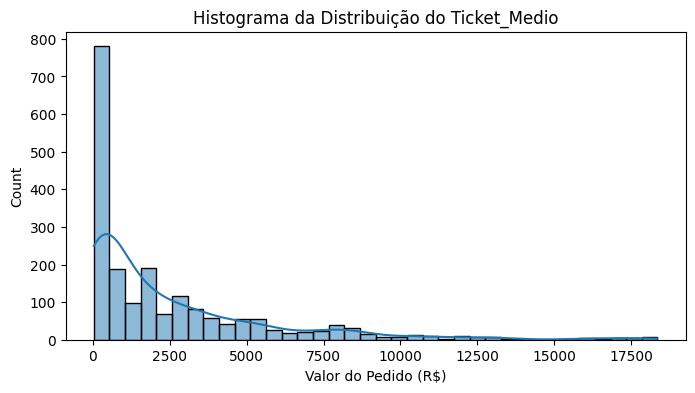

In [ ]:
#Histograma do ticket Médio
kpi = 'Ticket_Medio'
plt.figure(figsize=(8, 4))
sns.histplot(df_pedidos[kpi], kde=True)
plt.title(f'Histograma da Distribuição do {kpi}')
plt.xlabel('Valor do Pedido (R$)')
plt.show()

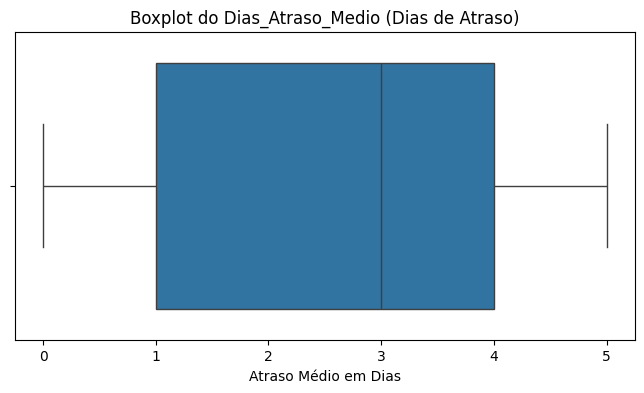

In [ ]:
#Boxplot do Atraso de Entrega

kpi = 'Dias_Atraso_Medio'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_pedidos[kpi])
plt.title(f'Boxplot do {kpi} (Dias de Atraso)')
plt.xlabel('Atraso Médio em Dias')
plt.show()

C:\Users\Jonas Lima\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


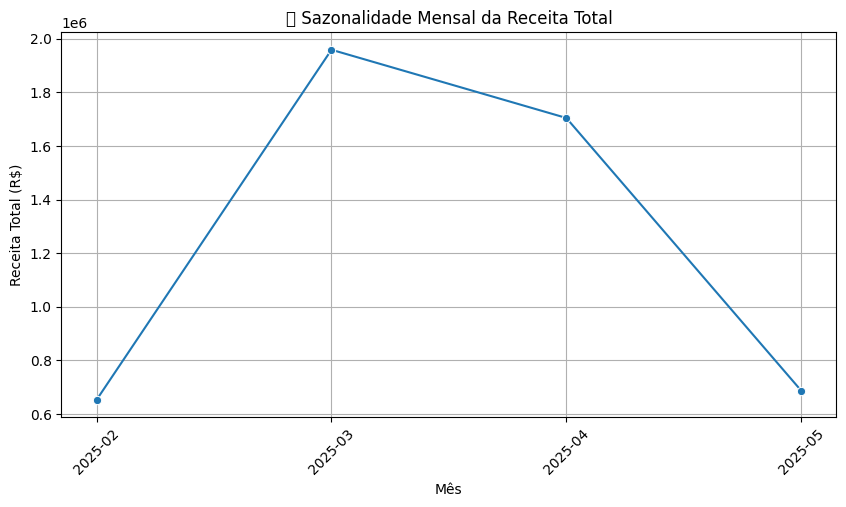

In [ ]:
# Série Temporal da Receita Mensal

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sazonalidade, x='Ano_Mes', y='Receita_Mensal', marker='o')
plt.title('📈 Sazonalidade Mensal da Receita Total')
plt.xlabel('Mês')
plt.ylabel('Receita Total (R$)')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()


Cálculo dos Intervalos de Confiança (ICs)

In [ ]:
from scipy import stats

In [ ]:
# IC para Média 
# Constante Z para 95% de Confiança
# Usaremos 1.96 para simplificar, já que a amostra é grande (n=2000)
Z_CRITICO = 1.96 
N_PEDIDOS = len(df_pedidos)

In [ ]:
# Obter Estatísticas
media_ticket = df_pedidos['Ticket_Medio'].mean()
std_ticket = df_pedidos['Ticket_Medio'].std()
erro_padrao_media = std_ticket / np.sqrt(N_PEDIDOS)

In [ ]:
# Calcular Margem de Erro
margem_erro_media = Z_CRITICO * erro_padrao_media

In [47]:
# IC Final
ic_min_ticket = media_ticket - margem_erro_media
ic_max_ticket = media_ticket + margem_erro_media

In [ ]:
# IC para Proporção
proporcao_atraso = df_pedidos['is_atrasado'].mean() 
p_hat = proporcao_atraso

In [49]:
# Calcular Erro Padrão da Proporção
erro_padrao_proporcao = np.sqrt( (p_hat * (1 - p_hat)) / N_PEDIDOS )

In [50]:
# Calcular Margem de Erro
margem_erro_proporcao = Z_CRITICO * erro_padrao_proporcao

In [51]:
# IC Final
ic_min_atraso = proporcao_atraso - margem_erro_proporcao
ic_max_atraso = proporcao_atraso + margem_erro_proporcao

In [53]:
print("\n--- 📊 Intervalos de Confiança (ICs 95%) ---")
print(f"Número de Pedidos (n): {N_PEDIDOS}")
print("-" * 40)

print(f"1. Ticket Médio (Média Observada: R$ {media_ticket:.2f})")
print(f"   IC 95% (Média): R$ [{ic_min_ticket:.2f}, R$ {ic_max_ticket:.2f}]")
print(f"   Insight: O Ticket Médio real do e-commerce está, com 95% de confiança, neste intervalo.")

print("-" * 40)

print(f"2. Taxa de Atraso (Proporção Observada: {proporcao_atraso:.2%})")
print(f"   IC 95% (Proporção): [{ic_min_atraso:.2%}, {ic_max_atraso:.2%}]")
print(f"   Insight: A Taxa de Atraso real da população de pedidos está, com 95% de confiança, neste intervalo.")


--- 📊 Intervalos de Confiança (ICs 95%) ---
Número de Pedidos (n): 2000
----------------------------------------
1. Ticket Médio (Média Observada: R$ 2502.08)
   IC 95% (Média): R$ [2360.52, R$ 2643.65]
   Insight: O Ticket Médio real do e-commerce está, com 95% de confiança, neste intervalo.
----------------------------------------
2. Taxa de Atraso (Proporção Observada: 83.25%)
   IC 95% (Proporção): [81.61%, 84.89%]
   Insight: A Taxa de Atraso real da população de pedidos está, com 95% de confiança, neste intervalo.
